# <center>Regression Analysis</center>
### Author:
Your name
### Date:
TODAY'S DATE

## Installing the relevant libraries

In [4]:
# After you run this code, put a # behind the "!pip" so it doesn't run again in the future
#!pip install shap

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import seaborn as sns
import shap
from scipy import stats

C:\Users\issac\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Uploading the data

In [6]:
file_path = 'S05_Startups.csv'

Data = pd.read_csv(file_path)
df = pd.DataFrame(Data)
df

df.head(n=3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


# Basic information about the dataframe

In [7]:
# Basic information about the dataframe
print("\n\033[1mBasic Information:\033[0m\n")
Data.info()


Basic Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
# Check for missing values
print("\n\033[1mMissing Values:\033[0m\n")
Data.isnull().sum()


Missing Values:



R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
# Descriptive statistics for numeric columns
print("\n\033[1mDescriptive Statistics:\033[0m\n")
round(Data.describe(), 2)


Descriptive Statistics:



,R&D Spend,Administration,Marketing Spend,Profit
count,50.00,50.00,50.00,50.00
mean,73721.62,121344.64,211025.10,112012.64
std,45902.26,28017.80,122290.31,40306.18
min,0.00,51283.14,0.00,14681.40
25%,39936.37,103730.88,129300.13,90138.90
50%,73051.08,122699.80,212716.24,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


In [10]:
# Summarize categorical columns (if any)
categorical_columns = Data.select_dtypes(include=['object']).columns
if not categorical_columns.empty:
    print("\n\033[1mSummary of Categorical Columns:\033[0m")
    for col in categorical_columns:
        print(f"\n\033[1mColumn: {col}\033[0m")
        print(Data[col].value_counts())


Summary of Categorical Columns:

Column: State
State
New York      17
California    17
Florida       16
Name: count, dtype: int64


# Data Analysis and Visualization

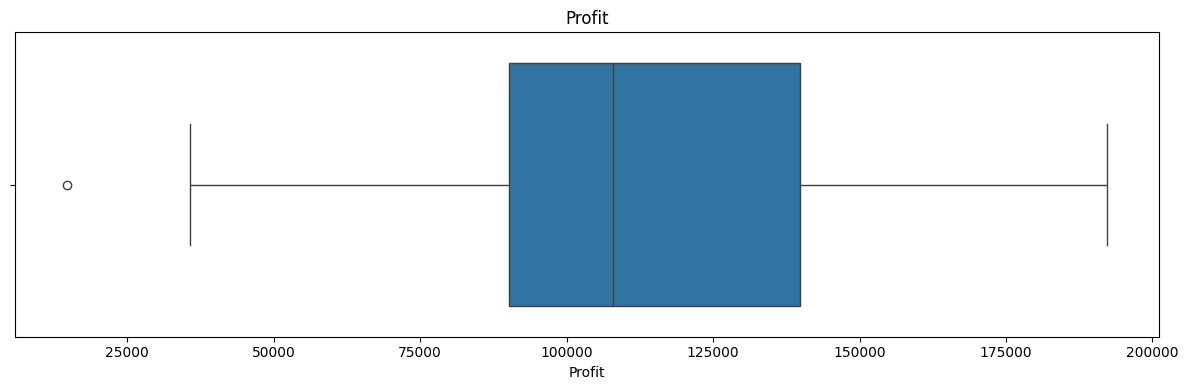

In [11]:
# Box Plot: Distribution of payment difficulties.
## Does it makes sence given that it has values of zeros and ones?
plt.figure(figsize = (12, 4))
sns.boxplot(x = 'Profit', data = Data)
plt.title('Profit')
#plt.ylabel('')
plt.xlabel('Profit')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig('05_box_plot_Profit.png')
plt.show()

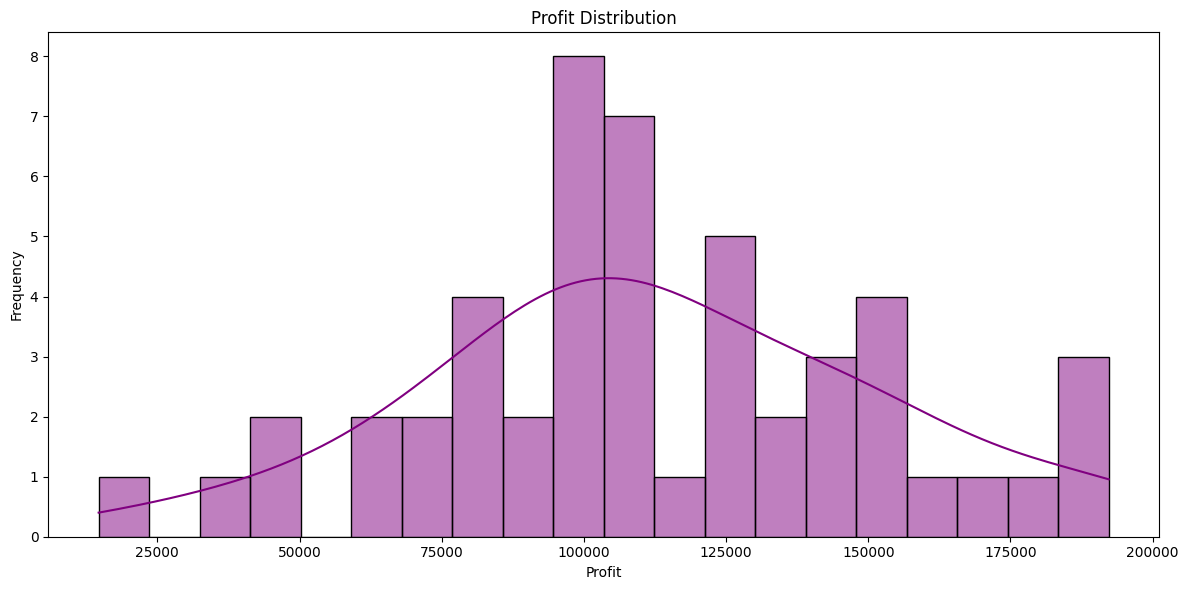

In [12]:
# Define the color for the histogram
custom_color = 'purple'

# Histogram: Distribution of final grades with a custom color
plt.figure(figsize = (12, 6))
sns.histplot(Data['Profit'], bins = 20, kde = True, color = custom_color)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('05_histogram_Profit.png')
plt.show()

Check different color palletes:
https://seaborn.pydata.org/tutorial/color_palettes.html

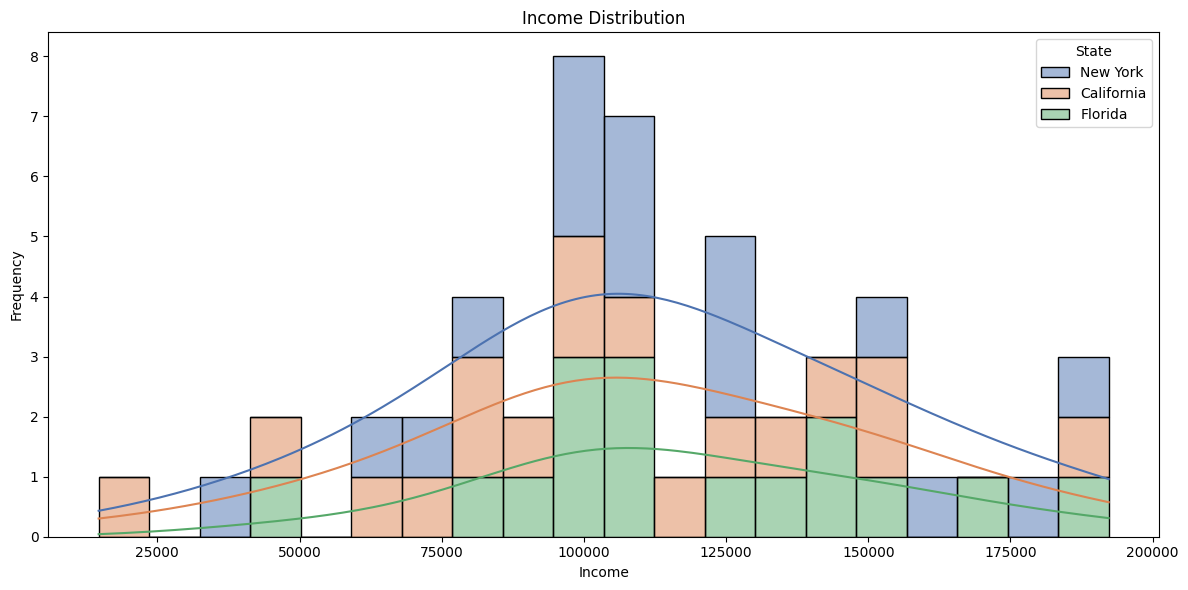

In [13]:
# Define a custom color palette
custom_palette = sns.color_palette("deep", Data['State'].nunique())

# Histogram: Distribution of final grades grouped by section with custom colors
plt.figure(figsize = (12, 6))
sns.histplot(Data, x = 'Profit', hue = 'State', bins = 20, kde = True, multiple = 'stack', palette = custom_palette)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('05_histogram_hue.png')
plt.show()

## Correlationship Matrix

In [14]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Mask the upper triangle and keep it empty
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix_lower = correlation_matrix.mask(mask, "")

# Remove the first row and last column
correlation_matrix_lower = correlation_matrix_lower.iloc[1:, :-1]

# Save the modified lower triangle of the correlation matrix to an Excel file
correlation_matrix_lower.to_excel('S05_cor_matrix_lower.xlsx')

print("The lower triangle of the correlation matrix (with empty upper values) has been saved to 'S05_cor_matrix_lower.xlsx'.")

correlation_matrix_lower

The lower triangle of the correlation matrix (with empty upper values) has been saved to 'S05_cor_matrix_lower.xlsx'.


,R&D Spend,Administration,Marketing Spend
Administration,0.241955,,
Marketing Spend,0.724248,-0.032154,
Profit,0.9729,0.200717,0.747766


Check different color palletes:
https://seaborn.pydata.org/tutorial/color_palettes.html

The kdeplot function in Seaborn is used to visualize the distribution of a dataset using Kernel Density Estimation (KDE). This method smooths the observations with a continuous probability density curve, which can be more interpretable than a histogram, especially when dealing with multiple distributions.

In [15]:
# Summarize categorical columns (if any)
categorical_columns = Data.select_dtypes(include=['object']).columns
if not categorical_columns.empty:
    print("\n\033[1mSummary of Categorical Columns:\033[0m")
    for col in categorical_columns:
        print(f"\n\033[1mColumn: {col}\033[0m")
        print(Data[col].value_counts())

# Looks like we don't have :)


Summary of Categorical Columns:

Column: State
State
New York      17
California    17
Florida       16
Name: count, dtype: int64


## Train-Val-Test split

Below: By stratifying based on y, the split maintains the same class distribution in each subset as in the original dataset, helping the model train, validate, and test more reliably on balanced proportions.

In [16]:
Data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [17]:
# Separate the features (X) and target (y)
X = Data.drop(columns=['Profit'])
y = Data['Profit']

### Convert the categorical value into numbers

In [18]:
X = pd.get_dummies(X, columns = ['State'], drop_first=True)
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing datasets have been created :)")

Training and testing datasets have been created :)


## Standardize the features

In [20]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

X_test

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
13,91992.39,135495.07,252664.93,False,False
39,38558.51,82982.09,174999.30,False,False
30,61994.48,115641.28,91131.24,True,False
45,1000.23,124153.04,1903.93,False,True
17,94657.16,145077.58,282574.31,False,True
48,542.05,51743.15,0.00,False,True
26,75328.87,144135.98,134050.07,True,False
25,64664.71,139553.16,137962.62,False,False
32,63408.86,129219.61,46085.25,False,False
19,86419.70,153514.11,0.00,False,True


# Machine Learning Models for regression
Are you ready?

In [27]:
# Before you run it, talk to your professor :)

def evaluate_model_performance(y_train, y_train_pred, y_test, y_test_pred):
    # Define epsilon for MAPE to avoid division by zero
    epsilon = 1e-10

    # Calculate metrics for the training set
    metrics_train = {
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'MAPE': np.mean(np.abs((y_train - y_train_pred) / (y_train + epsilon))) * 100,
        'R2': r2_score(y_train, y_train_pred)
    }

    # Calculate metrics for the testing set
    metrics_test = {
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'MAPE': np.mean(np.abs((y_test - y_test_pred) / (y_test + epsilon))) * 100,
        'R2': r2_score(y_test, y_test_pred)
    }

    # Combine the metrics into a DataFrame for easy viewing :)
    metrics_df = pd.DataFrame({'Training': metrics_train, 'Testing': metrics_test})
    
    return metrics_df

## Linear regression

In [22]:
# Train the Linear Regression model on scaled data
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
# Predict on the training and testing sets (still on the unscaled y)
y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

In [24]:
# Calculate unscaled coefficients
means = scaler.mean_
scales = scaler.scale_

# Unscale coefficients and intercept
unscaled_coefficients = lin_reg.coef_ / scales
unscaled_intercept = lin_reg.intercept_ - np.sum((means / scales) * lin_reg.coef_)

# Display unscaled coefficients with feature names
print("\nUnscaled Coefficients:")
print(f"Intercept: {unscaled_intercept}")
for feature, coef in zip(X.columns, unscaled_coefficients):
    print(f"{feature}: {coef}")


Unscaled Coefficients:
Intercept: 54028.0395940587
R&D Spend: 0.8056300637169757
Administration: -0.0687878822804109
Marketing Spend: 0.029855442922037446
State_Florida: 938.7930061484273
State_New York: 6.987759966988444


### SHAP values for feature importance

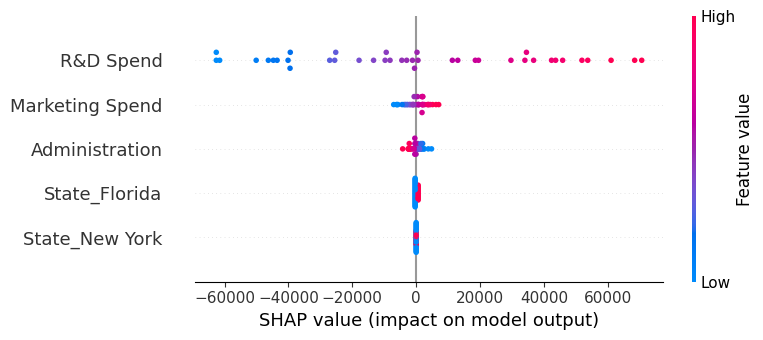

In [25]:
explainer = shap.Explainer(lin_reg, X_train_scaled)
shap_values = explainer(X_train_scaled)

# Display SHAP summary plot
shap.summary_plot(shap_values, X_train_scaled, feature_names = X.columns)

In [28]:
# Calculate evaluation metrics on unscaled target data
metrics_df = evaluate_model_performance(y_train, y_train_pred, y_test, y_test_pred)

metrics_df

,Training,Testing
MAE,6662.656241,6961.477813
RMSE,8927.489013,9055.957323
MAPE,10.947757,10.278190
R2,0.953702,0.898727


## Lasso (Least Absolute Shrinkage and Selection Operator)

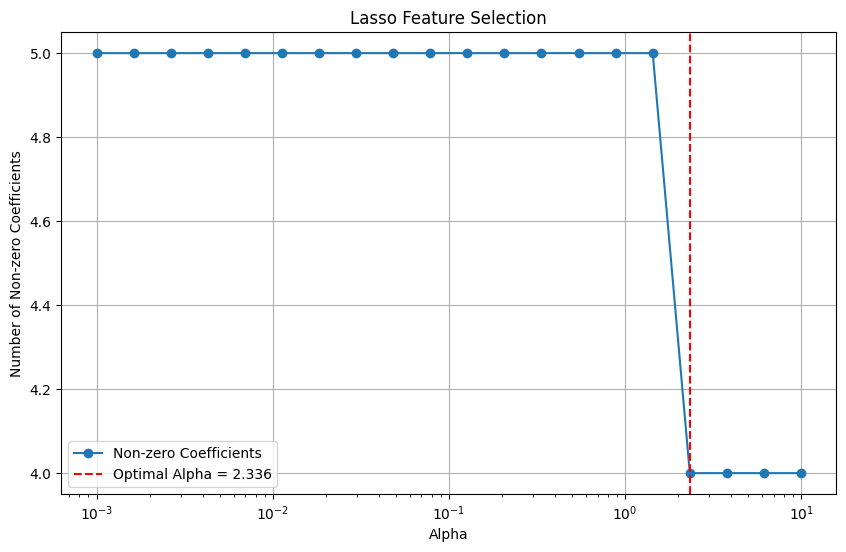

In [29]:
# Define a range of alpha values to try
alpha_values = np.logspace(-3, 1, 20)  # 20 values from 0.001 to 10 (log scale)
non_zero_counts = []

# Loop through each alpha value
for alpha in alpha_values:
    # Initialize and fit the Lasso model with the given alpha
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    
    # Count the number of non-zero coefficients
    non_zero_count = np.sum(lasso.coef_ != 0)
    non_zero_counts.append(non_zero_count)

# Calculate the delta between successive counts
deltas = np.diff(non_zero_counts)

# Find the optimal alpha by locating the largest delta drop
optimal_index = np.argmax(np.abs(deltas)) + 1  # +1 because np.diff reduces length by 1
optimal_alpha = alpha_values[optimal_index]
optimal_non_zero_count = non_zero_counts[optimal_index]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, non_zero_counts, marker='o', label='Non-zero Coefficients')
plt.axvline(x=optimal_alpha, color='r', linestyle='--', label=f'Optimal Alpha = {optimal_alpha:.3f}')
plt.xlabel('Alpha')
plt.ylabel('Number of Non-zero Coefficients')
plt.title('Lasso Feature Selection')
plt.xscale('log')  # Log scale for alpha
plt.legend()
plt.grid(True)
plt.show()

In [30]:
print(f"Optimal Alpha: {optimal_alpha:.3f}")
print(f"Number of non-zero coefficients at optimal alpha: {optimal_non_zero_count}")

# Display the features selected at the optimal alpha
lasso_optimal = Lasso(alpha=optimal_alpha)
lasso_optimal.fit(X_train_scaled, y_train)
selected_features = [feature for feature, coef in zip(X.columns, lasso_optimal.coef_) if coef != 0]

for feature in selected_features:
    print(f"- {feature}")

Optimal Alpha: 2.336
Number of non-zero coefficients at optimal alpha: 4
- R&D Spend
- Administration
- Marketing Spend
- State_Florida


In [31]:
# Train the Lasso Regression model with the optimal alpha
lasso_reg = Lasso(alpha = optimal_alpha)
lasso_reg.fit(X_train_scaled, y_train)

Lasso(alpha=np.float64(2.3357214690901213))

In [32]:
# Predict on the training and testing sets (still on the unscaled y)
y_train_pred = lasso_reg.predict(X_train_scaled)
y_test_pred = lasso_reg.predict(X_test_scaled)

In [33]:
# Calculate unscaled coefficients
means = scaler.mean_
scales = scaler.scale_

# Unscale coefficients and intercept
unscaled_coefficients = lasso_reg.coef_ / scales
unscaled_intercept = lasso_reg.intercept_ - np.sum((means / scales) * lasso_reg.coef_)

# Display unscaled coefficients with feature names
print(f"Intercept: {unscaled_intercept}")
for feature, coef in zip(X.columns, unscaled_coefficients):
    print(f"{feature}: {coef}")

Intercept: 54029.2909028141
R&D Spend: 0.8056868526060151
Administration: -0.06873734952563725
Marketing Spend: 0.029826029375679138
State_Florida: 931.4226601026834
State_New York: 0.0


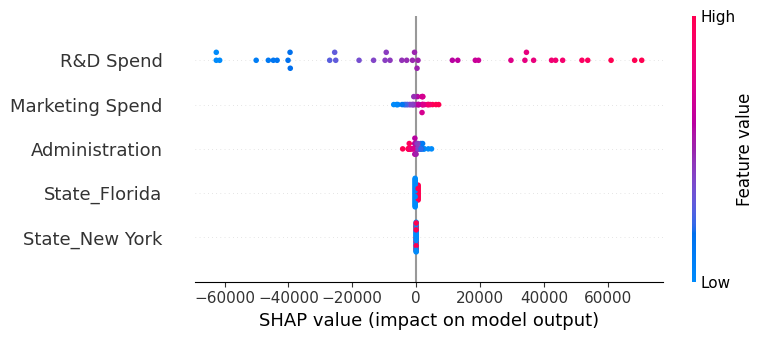

In [34]:
# SHAP values for feature importance
explainer = shap.Explainer(lasso_reg, X_train_scaled)
shap_values = explainer(X_train_scaled)

# Display SHAP summary plot
shap.summary_plot(shap_values, X_train_scaled, feature_names=X.columns)

In [35]:
# Calculate evaluation metrics on unscaled target data
metrics_df = evaluate_model_performance(y_train, y_train_pred, y_test, y_test_pred)

metrics_df

,Training,Testing
MAE,6662.028821,6960.251906
RMSE,8927.490291,9053.612153
MAPE,10.947875,10.276815
R2,0.953702,0.898779


## Pause
We saw that we should include the variable State_New York, so lets remove it

In [36]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


In [37]:
# Drop the "State_New York" variable from features after encoding
if 'State_New York' in X.columns:
    X = X.drop(columns=['State_New York'])
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida
0,165349.20,136897.80,471784.10,False
1,162597.70,151377.59,443898.53,False
2,153441.51,101145.55,407934.54,True
3,144372.41,118671.85,383199.62,False
4,142107.34,91391.77,366168.42,True


In [38]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize X data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear regression with out the State_New York

In [39]:
# Train the Linear Regression model on scaled data
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [40]:
# Predict on the training and testing sets (still on the unscaled y)
y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

In [41]:
# Calculate unscaled coefficients
means = scaler.mean_
scales = scaler.scale_

# Unscale coefficients and intercept
unscaled_coefficients = lin_reg.coef_ / scales
unscaled_intercept = lin_reg.intercept_ - np.sum((means / scales) * lin_reg.coef_)

# Display unscaled coefficients with feature names
print("\nUnscaled Coefficients:")
print(f"Intercept: {unscaled_intercept}")
for feature, coef in zip(X.columns, unscaled_coefficients):
    print(f"{feature}: {coef}")


Unscaled Coefficients:
Intercept: 54029.885919142114
R&D Spend: 0.8056328218594626
Administration: -0.0687837461153125
Marketing Spend: 0.029859723527789196
State_Florida: 935.0793356301056


### SHAP values for feature importance

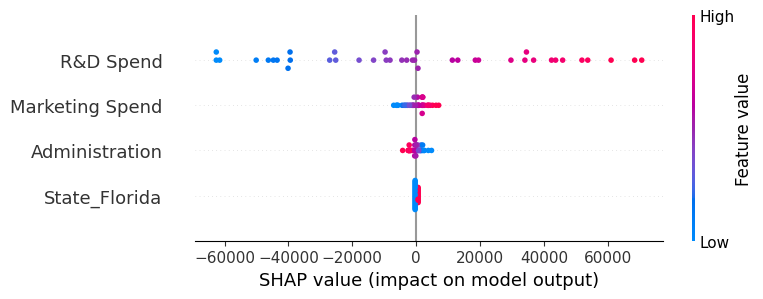

In [42]:
explainer = shap.Explainer(lin_reg, X_train_scaled)
shap_values = explainer(X_train_scaled)

# Display SHAP summary plot
shap.summary_plot(shap_values, X_train_scaled, feature_names = X.columns)

In [43]:
# Calculate evaluation metrics on unscaled target data
metrics_df = evaluate_model_performance(y_train, y_train_pred, y_test, y_test_pred)
metrics_df

,Training,Testing
MAE,6662.678029,6961.486846
RMSE,8927.489439,9055.957752
MAPE,10.948260,10.277742
R2,0.953702,0.898727


## Decision Tree Regressor

In [ ]:
# Define the maximum depth for the tree
max_depth = 1  # Look at your professor screen :)

In [ ]:
# Train the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
tree_reg.fit(X_train, y_train)

In [ ]:
# Predict on the training and testing sets
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

In [ ]:
plt.figure(figsize = (40, 10))
plot_tree(tree_reg, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
#plt.title("Decision Tree Visualization")

# Save the plot
plt.savefig('05_decision_tree_plot.png', format='png', dpi=1000) 

plt.show()

In [ ]:
# Create the SHAP explainer for the Decision Tree
explainer = shap.TreeExplainer(tree_reg)
shap_values = explainer.shap_values(X_train)

# Display SHAP summary plot
shap.summary_plot(shap_values, X_train, feature_names=X.columns)

# Optionally, save the SHAP plot
plt.savefig('05_shap_summary_plot.png', format='png', dpi=1000)
plt.show()

In [ ]:
# Calculate evaluation metrics
metrics_df = evaluate_model_performance(y_train, y_train_pred, y_test, y_test_pred)
print(metrics_df)

## Random Forest

In [ ]:
# Define Random Forest parameters (you have to modify these values)
n_estimators = 1     
max_depth = 2         
min_samples_split = 2  
min_samples_leaf = 1   
random_state = 42      

In [ ]:
# Train the Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=random_state
)
rf_reg.fit(X_train, y_train)

In [ ]:
# Predict on the training and testing sets
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

In [ ]:
# SHAP values for feature importance
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X_train)

# Display SHAP summary plot
shap.summary_plot(shap_values, X_train, feature_names=X.columns)

# Optionally, save the SHAP summary plot
plt.savefig('05_random_forest_shap_summary.png', format='png', dpi=1000)
plt.show()

In [ ]:
# Calculate evaluation metrics
metrics_df = evaluate_model_performance(y_train, y_train_pred, y_test, y_test_pred)
print(metrics_df)

## Gradient Boosting Regressor

In [ ]:
# Define parameters for Gradient Boosting Regressor (you can modify these)
gbr_params = {
    'n_estimators': 5,        
    'max_depth': 2,             
    'learning_rate': 0.1,       
    'subsample': 0.8,           
    'random_state': 42
}

In [ ]:
# Train the Gradient Boosting Regressor
gbr_reg = GradientBoostingRegressor(**gbr_params)
gbr_reg.fit(X_train, y_train)

In [ ]:
# Predict on the training and testing sets for Gradient Boosting
y_train_pred_gbr = gbr_reg.predict(X_train)
y_test_pred_gbr = gbr_reg.predict(X_test)

In [ ]:
# SHAP values for feature importance - Gradient Boosting
explainer_gbr = shap.TreeExplainer(gbr_reg)
shap_values_gbr = explainer_gbr.shap_values(X_train)

# Display and save SHAP summary plot for Gradient Boosting
shap.summary_plot(shap_values_gbr, X_train, feature_names=X.columns)
plt.savefig('05_gradient_boosting_shap_summary.png', format='png', dpi=1000)
plt.show()

In [ ]:
# Calculate evaluation metrics for Gradient Boosting
metrics_df_gbr = evaluate_model_performance(y_train, y_train_pred_gbr, y_test, y_test_pred_gbr)
print(metrics_df_gbr)

## XGBOOST 

In [ ]:
# Define parameters for XGBoost Regressor (you have to modify these)
xgb_params = {
    'n_estimators': 2,        
    'max_depth': 2,             
    'learning_rate': 0.1,       
    'subsample': 0.8,           
    'colsample_bytree': 0.8,   
    'random_state': 42
}

In [ ]:
# Train the XGBoost Regressor
xgb_reg = XGBRegressor(**xgb_params)
xgb_reg.fit(X_train, y_train)

# Predict on the training and testing sets for XGBoost
y_train_pred_xgb = xgb_reg.predict(X_train)
y_test_pred_xgb = xgb_reg.predict(X_test)

In [ ]:
# Convert boolean columns to integers
X_train['State_Florida'] = X_train['State_Florida'].astype(int)
X_test['State_Florida'] = X_test['State_Florida'].astype(int)

# Fill any NaN values that might have been introduced during conversion (optional)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

print(X_train.dtypes)  # This should show only numeric types like 'float64' or 'int64'

X_test

In [ ]:
# Proceed with the SHAP explanation for XGBoost
explainer_xgb = shap.Explainer(xgb_reg, X_train)
shap_values_xgb = explainer_xgb(X_train)

# Display and save SHAP summary plot for XGBoost
shap.summary_plot(shap_values_xgb, X_train, feature_names=X.columns)
plt.savefig('05_xgboost_shap_summary.png', format='png', dpi=1000)
plt.show()

In [ ]:
# Calculate evaluation metrics for XGBoost
metrics_df_xgb = evaluate_model_performance(y_train, y_train_pred_xgb, y_test, y_test_pred_xgb)
print(metrics_df_xgb)

## Support Vector Regressor

In [ ]:
# Define parameters for SVM Regressor
kernel = 'linear'       #'linear', 'poly', 'rbf', 'sigmoid'
C = 0.05              
epsilon = 0.01        

# Train the SVM Regressor on scaled data
svm_reg = SVR(kernel = kernel, C = C, epsilon = epsilon)
svm_reg.fit(X_train_scaled, y_train)  # Using scaled training data

In [ ]:
# Predict on the scaled training and testing sets
y_train_pred = svm_reg.predict(X_train_scaled)
y_test_pred = svm_reg.predict(X_test_scaled)  # Using scaled testing data

In [ ]:
# SHAP values for feature importance - SVM
explainer_svm = shap.KernelExplainer(svm_reg.predict, X_train_scaled)
shap_values_svm = explainer_svm.shap_values(X_train_scaled)

# Display and save SHAP summary plot for SVM
shap.summary_plot(shap_values_svm, X_train_scaled, feature_names=X.columns)
plt.savefig('05_svm_shap_summary.png', format='png', dpi=1000)
plt.show()

In [ ]:
# Calculate evaluation metrics
metrics_df = evaluate_model_performance(y_train, y_train_pred, y_test, y_test_pred)
print(metrics_df)